In [1]:
## Carga de librerias
import cv2 #openCV open computr vision
import numpy as np # numeric python
from matplotlib import pyplot as plt
import math
import random
import time

In [2]:
def cargar(direccion):
    img = cv2.imread(direccion) #cargamos la imagen de la  direccion dada
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def show(imagen):
    plt.figure()
    plt.imshow(imagen)
    plt.axis('off')
    plt.show() #Mostramos el plot
    pass

# Implementacion de correccion de color para personas con daltonismo

### LMS Daltonization Algorithm
#### Su idea es utilizar la información perdida en la simulación de la ceguera al color y usar el espacio de color
#### LMS para compensar los colores que faltan en cada grupo / tipo de conos (largo (L), medio (M) y corto (S)) para
#### estar predecible para el espectador 

In [3]:
lmsColorSpaceM = np.array([[17.8824, 43.5161, 4.11935],
                           [3.45565, 27.1554, 3.86714],
                           [0.0299566, 0.184309, 1.46709]])


In [4]:
def LMSColorSpace(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            img[n][m]= np.dot(lmsColorSpaceM,img[n][m])
    return img



In [5]:
protanopiaM = np.array([[0, 2.02344, -2.52581],
                        [0, 1, 0],
                        [0, 0, 1]])
duteranopiaM = np.array([[1, 0, 0],
                         [0.49421, 0, 1.24827],
                         [0, 0, 1]])
tritanopiaM = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [-0.395913, 0.801109, 0]])

In [6]:
def SimulateColorBlindness(image, type):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            if (type == 'p'):
                img[n][m]= np.dot(protanopiaM,img[n][m])
            elif (type == 'd'):
                img[n][m]= np.dot(duteranopiaM,img[n][m])
            elif (type == 't'):
                img[n][m]= np.dot(tritanopiaM,img[n][m])
    return img



In [7]:
rgbM = np.array([[0.089044447, -0.130504409, 0.116721066],
                 [0.113614708, -0.0102485335, 0.0540193266],
                 [-0.000365296,-0.004121614, 0.693511405]])

In [8]:
def convertToRGB(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            img[n][m]= np.dot(rgbM,img[n][m])
    return img



In [9]:
def diff(original,image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            img[n][m] = original[n][m]-img[n][m]
    return img



In [10]:
protanopiaSV = np.array([[0, 0, 0],
                         [0.7, 1, 0],
                         [0.7, 0, 1]])
duteranopiaSV = np.array([[1, 0.7, 0],
                         [0, 0, 0],
                         [0, 0.7, 1]])
tritanopiaSV = np.array([[1, 0, 0.7],
                         [0, 1, 0.7],
                         [0, 0, 0]])

In [11]:
def SpectroVisible(image, type):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            if (type == 'p'):
                img[n][m]= np.dot(protanopiaSV,img[n][m])
            elif (type == 'd'):
                img[n][m]= np.dot(duteranopiaSV,img[n][m])
            elif (type == 't'):
                img[n][m]= np.dot(tritanopiaSV,img[n][m])
    return img



In [12]:
def summ(original,image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            img[n][m] = original[n][m] + img[n][m]
    return img


In [13]:
def test1():
    test = cargar('Dataset/pdi3.PNG')
    
    btest = LMSColorSpace(test)
    btestp = SimulateColorBlindness(btest,'p')
    btestd = SimulateColorBlindness(btest,'d')
    btestt = SimulateColorBlindness(btest,'t')
    
    btestp = convertToRGB(btestp)
    btestd = convertToRGB(btestd)
    btestt= convertToRGB(btestt)
    
#     btestp = diff(test,btestp)
#     btestd = diff(test,btestd)
#     btestt = diff(test,btestt)
    
#     btestp = SpectroVisible(btestp,'p')
#     btestd = SpectroVisible(btestd,'d')
#     btestt = SpectroVisible(btestt,'t')
    
    btestp = summ(test,btestp)
    btestd = summ(test,btestd)
    btestt = summ(test,btestt)
    
    show(test)
    show(btestp)
    show(btestd)
    show(btestt)
    pass
test1()

KeyboardInterrupt: 

In [0]:
def DominationColor(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            h,s,l = img[n][m]
            if img[n][m] <= np.array([255,0,0]):
                h = 0.7*h
                s = 0.9*s
                l = 1.25*l
                img[n][m]=np.array([h,l,s])
            else:
                s = 1.1*s
                l = 0.9*l

In [21]:
def imageRGBToHSL(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            h=l=s=0
            R,G,B = img[n][m]/255
            minimo = np.amin([R,G,B])
            maximo = np.amax([R,G,B])
            d = maximo - minimo
            #light
            l = (maximo+minimo)/2
            # excepcion
            if d == 0.0:
                h = 0
                s = 0
            #hue
            elif maximo == R:
                h = 60*((G-B)/d % 6)
            elif maximo == G:
                h = 60*((B-R)/d)+120
            elif maximo == B:
                h = 60*((R-G)/d)+240
            #saturate
            if 0 <l <= 0.5 :
                s = (d/(maximo+minimo))
            elif l > 0.5 :
                s = (d/(2 - (maximo+minimo)))
            h = np.around(h,decimals=1)
            s = np.around(s,decimals=3)
            l = np.around(l,decimals=3)
            img[n][m] = np.array([h,s,l])
    return img


In [29]:
def imageHSLToRGB(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            h,s,l = img[n][m]
            R=G=B=0
            c = (1-math.fabs(2*l-1))*s
            x = c * (1 - math.fabs( (h/60) % 2 -1))
            M = l - c/2
            r,g,b = [0,0,0]
            if 300 < h < 360:
                r,g,b = [c,0,x]
            R = (r+M)*255
            G = (g+M)*255
            B = (b+M)*255
            R = np.around(R,decimals=1)
            G = np.around(G,decimals=1)
            B = np.around(B,decimals=1)
            img[n][m] = np.array([R,G,B])
    return img

/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars


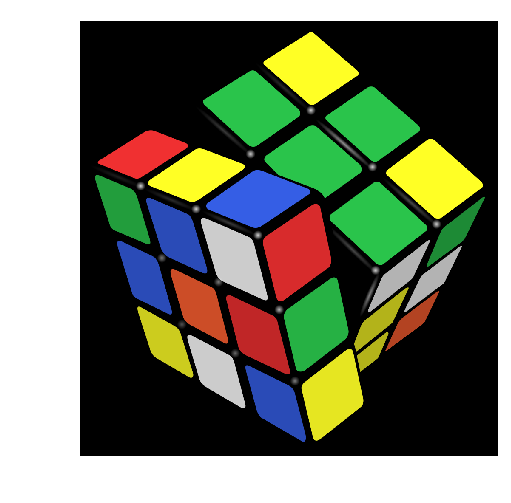

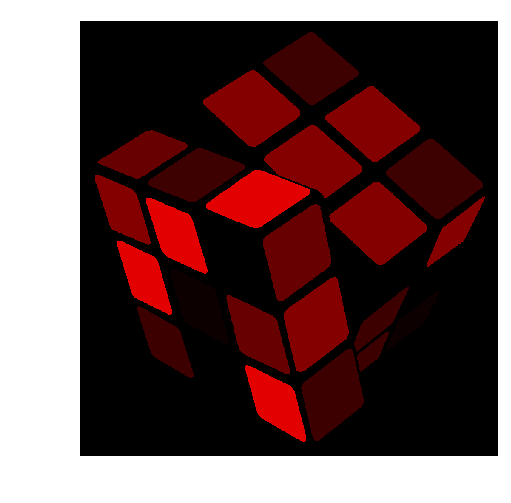

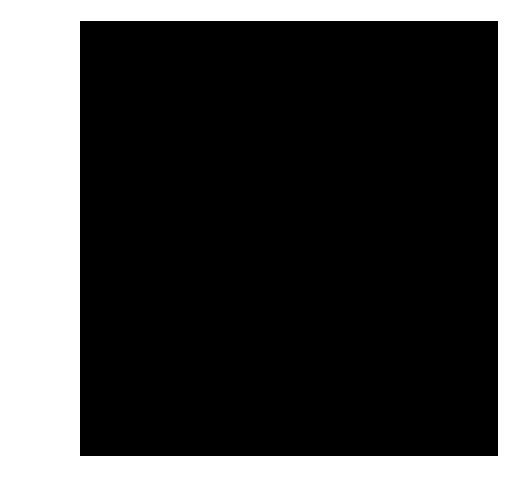

In [30]:
def testColorBlind():
    test = cargar('Dataset/pdi3.PNG')
    b = imageRGBToHSL(test)
    b2 = imageHSLToRGB (b)
    show(test)
    show(b)
    show(b2)
        
testColorBlind()
